In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree, export_text
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [3]:

dataset_path = 'https://raw.githubusercontent.com/Koldim2001/test_api/refs/heads/main/titanic.csv' 
df = pd.read_csv(dataset_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = df[['Survived', 'Pclass', 'Age', 'Fare']] 
df.info

<bound method DataFrame.info of      Survived  Pclass   Age     Fare
0           0       3  22.0   7.2500
1           1       1  38.0  71.2833
2           1       3  26.0   7.9250
3           1       1  35.0  53.1000
4           0       3  35.0   8.0500
..        ...     ...   ...      ...
886         0       2  27.0  13.0000
887         1       1  19.0  30.0000
888         0       3   NaN  23.4500
889         1       1  26.0  30.0000
890         0       3  32.0   7.7500

[891 rows x 4 columns]>

In [7]:
df = df.dropna(subset=['Age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [8]:
df.drop(columns='Survived') 

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
885,3,39.0,29.1250
886,2,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [9]:
train, test = train_test_split(df, test_size=0.2)
train.head()

,Survived,Pclass,Age,Fare
226,1,2,19.0,10.50
460,1,1,48.0,26.55
708,1,1,22.0,151.55
282,0,3,16.0,9.50
672,0,2,70.0,10.50


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
def experiment(max_depth, min_samples_split):
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(train.drop('Survived', axis=1), train['Survived'])
    preds = model.predict(test.drop('Survived', axis=1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)
    print("accuracy", acc)
    plot_confusion_matrix(cm, classes=['Not Survived', 'Survived'])
    report = classification_report(test['Survived'], preds, target_names=['Not Survived', 'Survived'])
    print(report)
    with open('/workspaces/test-repo-tut1-2/FileX/model_dt.pkl', 'wb') as f:
        pickle.dump(model, f)
        

In [12]:
max_depth = 5
min_samples_split = 150

accuracy 0.6923076923076923
Confusion matrix, without normalization
              precision    recall  f1-score   support

Not Survived       0.76      0.74      0.75        90
    Survived       0.58      0.60      0.59        53

    accuracy                           0.69       143
   macro avg       0.67      0.67      0.67       143
weighted avg       0.69      0.69      0.69       143



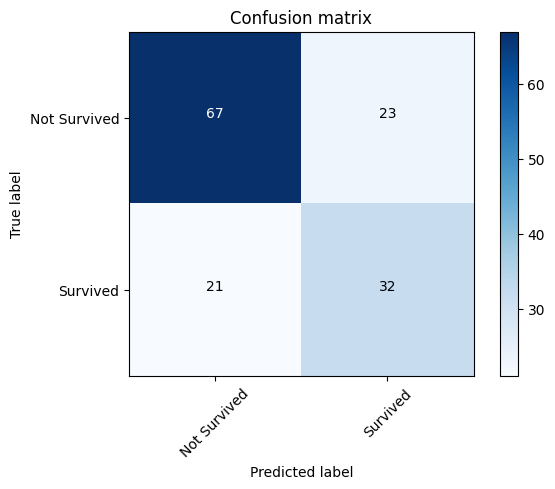

In [13]:
experiment(max_depth, min_samples_split)

In [14]:
with open('/workspaces/test-repo-tut1-2/FileX/model_dt.pkl', 'rb') as f:
    model = pickle.load(f)

In [15]:
person = pd.DataFrame({
	'Pclass':[3],
	'Age':[55],
	'Fare':[7.2500]	
})

prediction = model.predict(person)
print(f"The model predicts {prediction}")

The model predicts [0]


In [16]:
if prediction == [1]:
    print ("This person is, the most likely, is a survivor.")
else:
    print("This person, the most likely, perished.")

This person, the most likely, perished.


[Text(0.45454545454545453, 0.9166666666666666, 'Pclass <= 2.5\ngini = 0.486\nsamples = 571\nvalue = [334, 237]'),
 Text(0.18181818181818182, 0.75, 'Fare <= 13.679\ngini = 0.489\nsamples = 293\nvalue = [125, 168]'),
 Text(0.3181818181818182, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.438\nsamples = 71\nvalue = [48, 23]'),
 Text(0.2727272727272727, 0.5833333333333334, 'Age <= 53.5\ngini = 0.453\nsamples = 222\nvalue = [77, 145]'),
 Text(0.18181818181818182, 0.4166666666666667, 'Age <= 17.5\ngini = 0.416\nsamples = 190\nvalue = [56.0, 134.0]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(0.2727272727272727, 0.25, 'Pclass <= 1.5\ngini = 0.443\nsamples = 163\nvalue = [54.0, 109.0]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.398\nsamples = 113\nvalue = [31.0, 82.0]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.36363636363636365

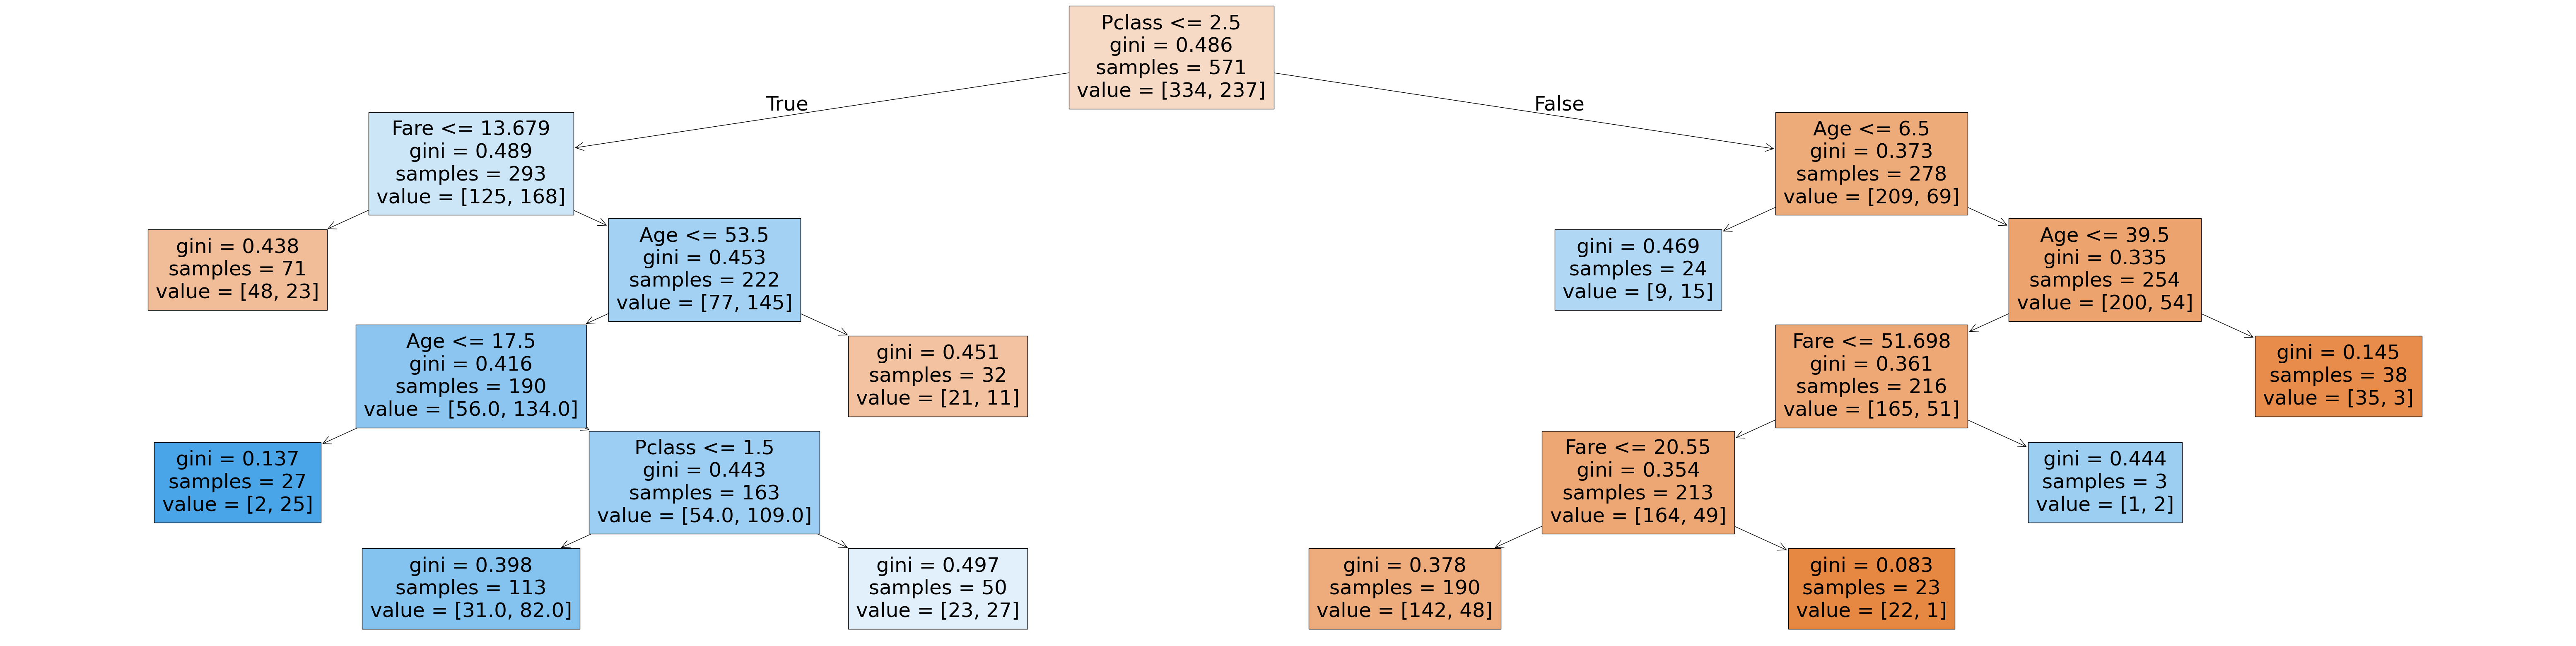

In [17]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=df.drop(columns='Survived').columns, max_depth=5, filled=True)

In [18]:
tree_text = export_text(model, max_depth=5, feature_names=df.drop(columns='Survived').columns)
print(tree_text)

|--- Pclass <= 2.50
|   |--- Fare <= 13.68
|   |   |--- class: 0
|   |--- Fare >  13.68
|   |   |--- Age <= 53.50
|   |   |   |--- Age <= 17.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  17.50
|   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Pclass >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- Age >  53.50
|   |   |   |--- class: 0
|--- Pclass >  2.50
|   |--- Age <= 6.50
|   |   |--- class: 1
|   |--- Age >  6.50
|   |   |--- Age <= 39.50
|   |   |   |--- Fare <= 51.70
|   |   |   |   |--- Fare <= 20.55
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  20.55
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  51.70
|   |   |   |   |--- class: 1
|   |   |--- Age >  39.50
|   |   |   |--- class: 0



<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

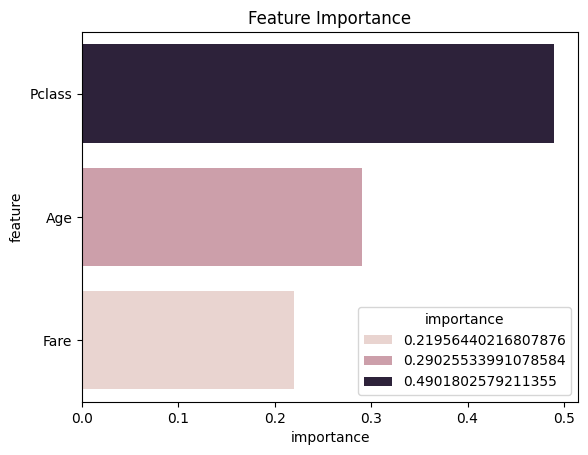

In [19]:
importance_df = pd.DataFrame({
    'feature': df.drop(columns='Survived').columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='importance')

In [20]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train.drop(columns='Survived'), train['Survived'])
    train_acc = 1 - model.score(train.drop(columns='Survived'), train['Survived'])
    test_acc = 1 - model.score(test.drop(columns='Survived'), test['Survived'])
    return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': test_acc}

In [21]:
errors_list = []

for md in range(1, 21):
    result = max_depth_error(md)
    errors_list.append(result)

errors_df = pd.DataFrame(errors_list)

In [22]:
errors_df

,Max Depth,Training Error,Test Error
0,1,0.339755,0.314685
1,2,0.285464,0.307692
2,3,0.255692,0.293706
3,4,0.241681,0.300699
4,5,0.229422,0.300699
5,6,0.208406,0.293706
6,7,0.185639,0.300699
7,8,0.178634,0.286713
8,9,0.155867,0.307692
9,10,0.141856,0.314685


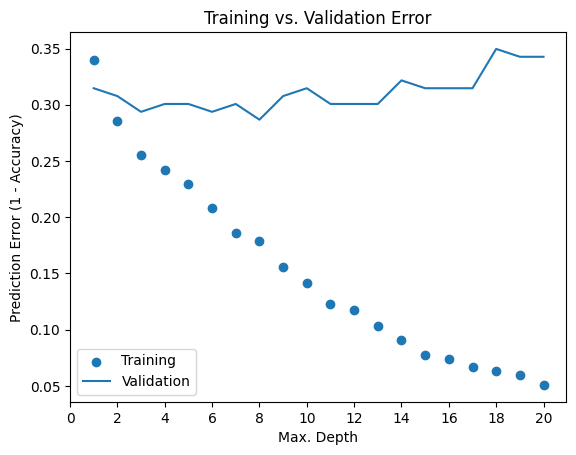

In [23]:
plt.figure()
plt.scatter(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

In [24]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [ ]:
import streamlit as st
import pickle
import numpy as np

def main():
    with open('', 'rb') as file:
        model = pickle.load(file)

    st.title("🚢 Titanic Survival Prediction")

    pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3], index=2)
    age = st.number_input("Age", min_value=0.0, max_value=100.0, value=25.0)
    fare = st.number_input("Fare", min_value=0.0, max_value=600.0, value=50.0)

    if st.button("Predict"):
        features = np.array([[pclass, age, fare]])
        prediction = model.predict(features)

        if prediction[0] == 1:
            st.success("🎉 Survived")
        else:
            st.error("💀 Did not survive")

if __name__ == "__main__":
    main()


2025-03-24 12:35:33.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:35:33.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:35:33.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:35:33.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:35:33.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:35:33.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:35:33.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:35:33.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar